
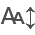

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    PolynomialFeatures,
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import random
import sys
from dvclive import Live

from itables import init_notebook_mode
import itables.options as opt

init_notebook_mode(all_interactive=True)
opt.maxBytes = "64KB"

In [ ]:
# with Live(save_dvc_exp=True) as live:
#     epochs = int(sys.argv[1])
#     live.log_param("epochs", epochs)
#     for epoch in range(epochs):
#         live.log_metric("train/accuracy", epoch + random.random())
#         live.log_metric("train/loss", epochs - epoch - random.random())
#         live.log_metric("val/accuracy", epoch + random.random())
#         live.log_metric("val/loss", epochs - epoch - random.random())
#         live.next_step()

In [5]:
df = pd.read_csv("merged.csv", header=0)
df

Agent  TotalCalls  UsefulCalls  ConnectedCallTimeMins  \
0          Adriana Hernandez       214.0        214.0              29.300000   
1              Alberto Conde      3159.0       3055.0            1468.833333   
2          Alejandra Almonte      3742.0       3737.0             835.833333   
3              Amanda Campos      6012.0       5911.0            1397.650000   
4             Amanda Da Rosa       449.0        445.0             235.183333   
..                       ...         ...          ...                    ...   
137       Veronica Miquilena         0.0          0.0               0.000000   
138       Verónica Miquilena      8929.0       8857.0            4049.766667   
139         Victor Fernandes      6066.0       5999.0            2432.750000   
140          Wolfang Freites      6783.0       6651.0            2904.733333   
141  Úrsula Salazar Berrueco         0.0          0.0               0.000000   

     UsefulCallTimeMins  ConnectedCalls  MedianConnectedCallTime  TotalEmails  \
0             80.316667             9.0                 2.600000        257.0   
1           2174.333333           205.0                 4.066667       3148.0   
2           1437.683333           215.0                 2.983333       2171.0   
3           2470.483333           315.0                 3.383333       3937.0   
4            313.683333            54.0                 2.833333         13.0   
..                  ...             ...                      ...          ...   
137            0.000000             0.0                 0.000000          0.0   
138         6431.733333           825.0                 3.033333          8.0   
139         4517.466667           513.0                 2.966667         25.0   
140         4789.350000           480.0                 3.766667       5294.0   
141            0.000000             0.0                 0.000000          0.0   

      Booking  TotalRevenue  AverageTicket  TotalNewLeads  GrossCRLead_per  \
0     11540.0       11540.0   11540.000000            117         0.854701   
1    149103.0      129934.0    8283.500000           1319         1.364670   
2    114173.0      109101.0    2594.840909           1342         3.278689   
3     31020.0       23486.0    2068.000000           1916         0.782881   
4         0.0           0.0       0.000000            109         0.000000   
..        ...           ...            ...            ...              ...   
137       0.0           0.0       0.000000              2         0.000000   
138  341709.0      253494.0    6973.653061           3557         1.377565   
139  240254.0      156266.0   15015.875000           2373         0.674252   
140   72799.0       66826.0    2141.147059           2168         1.568266   
141       0.0           0.0       0.000000              1         0.000000   

       L2A_per   A2PA_per  PaidApps  AllApps  
0    14.529915   5.882353         1       17  
1     8.263836  16.513761        18      109  
2    10.357675  31.654676        44      139  
3     5.584551  14.018692        15      107  
4     7.339450   0.000000         0        8  
..         ...        ...       ...      ...  
137   0.000000   0.000000         0        0  
138   4.723081  29.166667        49      168  
139   3.497682  19.277108        16       83  
140   5.258303  29.824561        34      114  
141   0.000000   0.000000         0        0  

[142 rows x 17 columns]

### Data preprocessing and transformations

Common to all models


In [6]:
# Separate features and target variable, drop useless features
X = df.drop(
    [
        "Agent",
        "Booking",
        "GrossCRLead_per",
        "L2A_per",
        "AverageTicket",
        "TotalRevenue",
        "A2PA_per",
    ],
    axis=1,
)
y = df["Booking"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

In [7]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [8]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

### Linear Regression

Purpose: Used for predicting continuous numerical values. Usage: Suitable when the relationship between the independent and dependent variables is linear.


In [22]:
# Define the model
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error Score: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 9227281085.143812
R^2 Score: 0.7663389318252769
Mean Absolute Error Score: 56159.40841258009
Root Mean Squared Error: 96058.73768243997


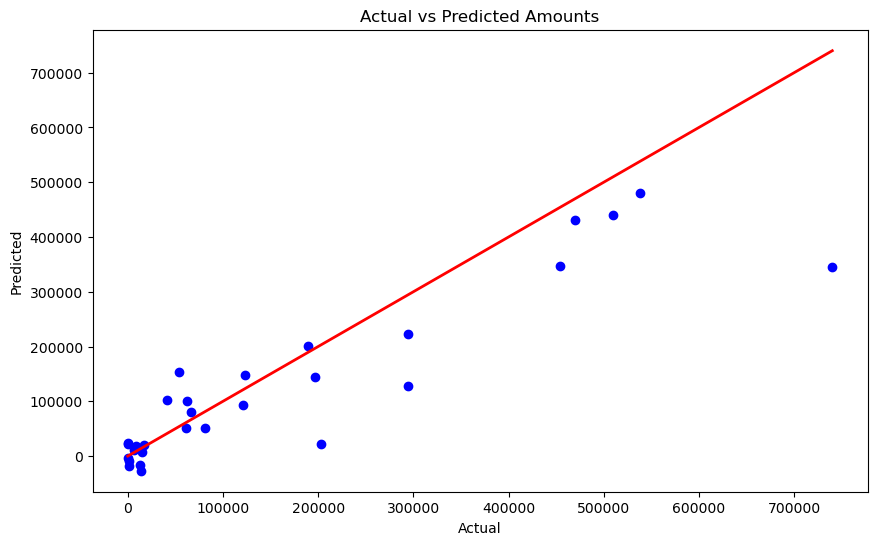

In [25]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Polynomial Regression

Purpose: Extends linear regression by considering polynomial relationships between the features and the target variable.
Usage: Suitable when the relationship between the independent and dependent variables is non-linear. Adjust the degree of the polynomial features to fine-tune the model's performance.


In [16]:
# Define the Polynomial Features and Linear Regression model
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("poly", polynomial_features),
        ("regressor", LinearRegression()),
    ]
)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2977036929122.6055
R^2 Score: -74.38706390708634
Mean Absolute Error: 657492.3813676802
Root Mean Squared Error: 1725409.206281978


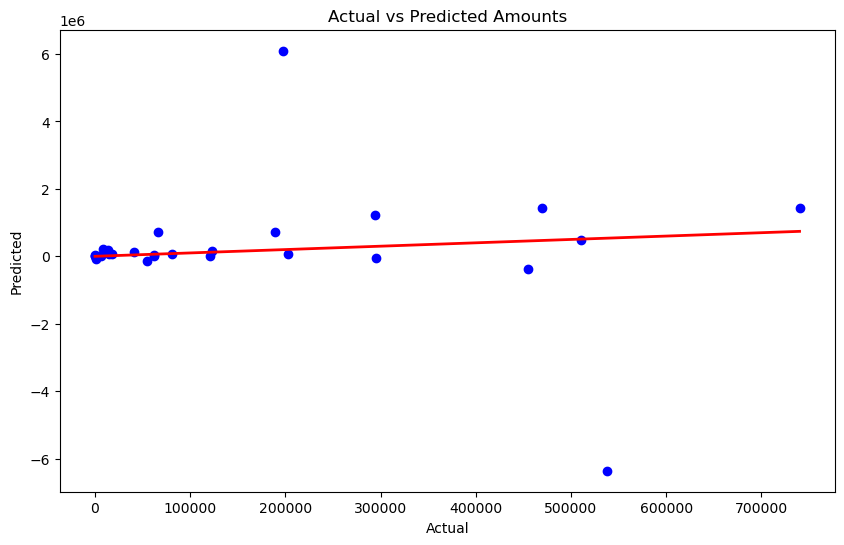

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

In [20]:
# epochs = 2
# with Live(save_dvc_exp=True) as live:

#     live.log_param("epochs", epochs)
#     for epoch in range(epochs):
#         live.log_metric("train/accuracy", epoch + random.random())
#         live.log_metric("train/loss", epochs - epoch - random.random())
#         live.log_metric("val/accuracy", epoch + random.random())
#         live.log_metric("val/loss", epochs - epoch - random.random())
#         live.next_step()
#         epochs += 1

### Ridge Regression

Purpose: Linear regression with L2 regularization to prevent overfitting.
Usage: Suitable when multicollinearity is present in the data. You can adjust the alpha parameter to fine-tune the model's performance.


In [26]:
# Define the Ridge Regression model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=1, random_state=42)),
    ]
)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 9110227583.990803
R^2 Score: 0.7693030602462739
Mean Absolute Error: 53435.69921284502
Root Mean Squared Error: 95447.51219382725


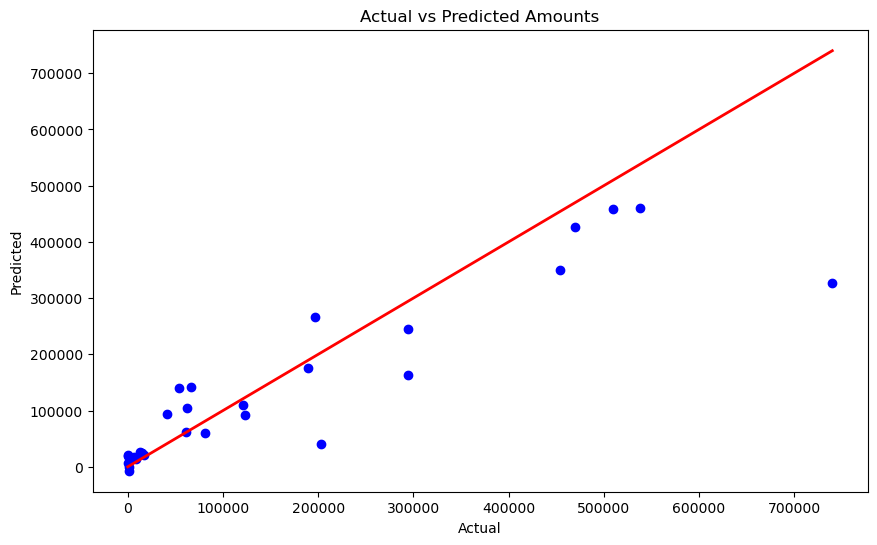

In [29]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Lasso Regression

Purpose: Linear regression with L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.
Usage: Suitable when feature selection is needed. You can adjust the alpha parameter to fine-tune the model's performance.


In [18]:
# Define the Lasso Regression model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Lasso(alpha=1.0, random_state=42)),
    ]
)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/Users/ricardoquintero/anaconda3/envs/GA1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.430e+11, tolerance: 3.527e+08
  model = cd_fast.enet_coordinate_descent(


In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 9228786887.038591
R^2 Score: 0.7663008006275874
Mean Absolute Error: 55580.3760818611
Root Mean Squared Error: 96066.57528526033


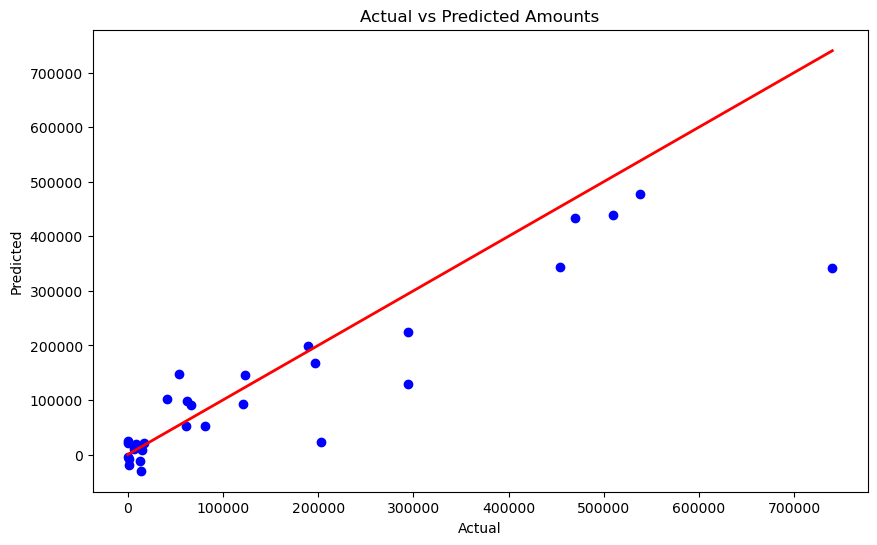

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Elastic Net Regression

Purpose: Combines L1 and L2 regularization to balance between Ridge and Lasso regression.
Usage: Suitable when dealing with multiple correlated features. You can adjust hyperparameters such as alpha and l1_ratio to fine-tune the model's performance.


In [22]:
# Define the Elastic Net model
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", ElasticNet(random_state=42))]
)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 13780118535.798435
R^2 Score: 0.6510481054020281
Mean Absolute Error: 77524.30277661883
Root Mean Squared Error: 117388.74961340391


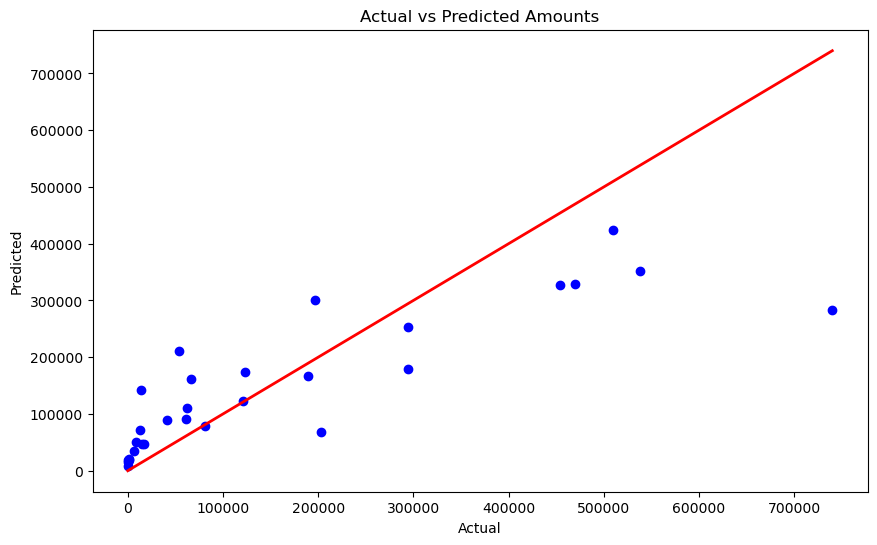

In [25]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Decision Tree Regression

Purpose: Non-linear model that splits the data into subsets based on feature values, creating a tree structure.
Usage: Suitable for capturing complex interactions between features. Adjust hyperparameters like max_depth, min_samples_split, and min_samples_leaf to fine-tune the model's performance.


In [33]:
# Define the Decision Tree model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", DecisionTreeRegressor(random_state=42, min_samples_split=5)),
    ]
)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 10447055995.536942
R^2 Score: 0.7354507529711541
Mean Absolute Error: 60766.35533045977
Root Mean Squared Error: 102210.84089046984


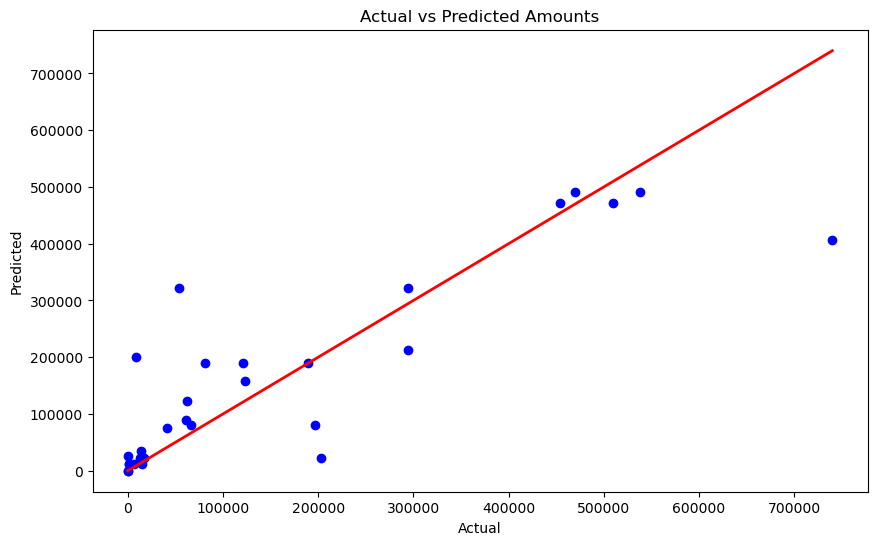

In [36]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

In [37]:
epochs = 2
with Live(save_dvc_exp=True) as live:

    live.log_param("epochs", epochs)
    for epoch in range(epochs):
        live.log_metric("train/accuracy", epoch + random.random())
        live.log_metric("train/loss", epochs - epoch - random.random())
        live.log_metric("val/accuracy", epoch + random.random())
        live.log_metric("val/loss", epochs - epoch - random.random())
        live.next_step()
        epochs += 1

### Random Forest Regression

Purpose: Ensemble model that builds multiple decision trees and averages their predictions.
Usage: Suitable for improving accuracy and reducing overfitting compared to a single decision tree. Adjust hyperparameters like n_estimators, max_depth, and min_samples_split to fine-tune the model's performance.


In [30]:
# Define the Random Forest model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=10, random_state=42)),
    ]
)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 21636377252.191154
R^2 Score: 0.45210523300109573
Mean Absolute Error: 83545.46382758622
Root Mean Squared Error: 147093.09042980624


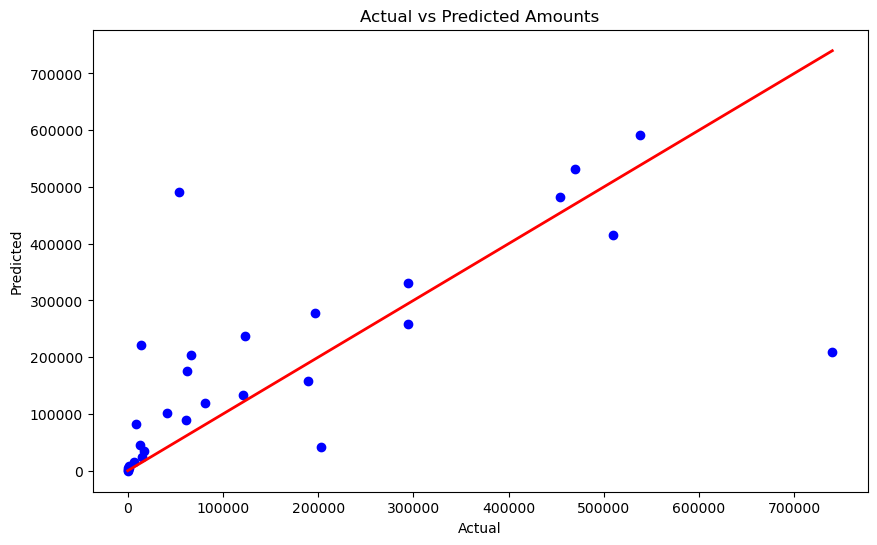

In [33]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Gradient Boosting Regression

Purpose: Ensemble model that builds trees sequentially, where each tree attempts to correct the errors of the previous ones.
Usage: Suitable for achieving high predictive accuracy. Adjust hyperparameters like n_estimators, learning_rate, and max_depth to fine-tune the model's performance.


In [34]:
# Define the Gradient Boosting model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            GradientBoostingRegressor(
                n_estimators=10, learning_rate=1, max_depth=5, random_state=42
            ),
        ),
    ]
)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 16140003969.288141
R^2 Score: 0.5912890771388741
Mean Absolute Error: 67632.62444393605
Root Mean Squared Error: 127043.31532704954


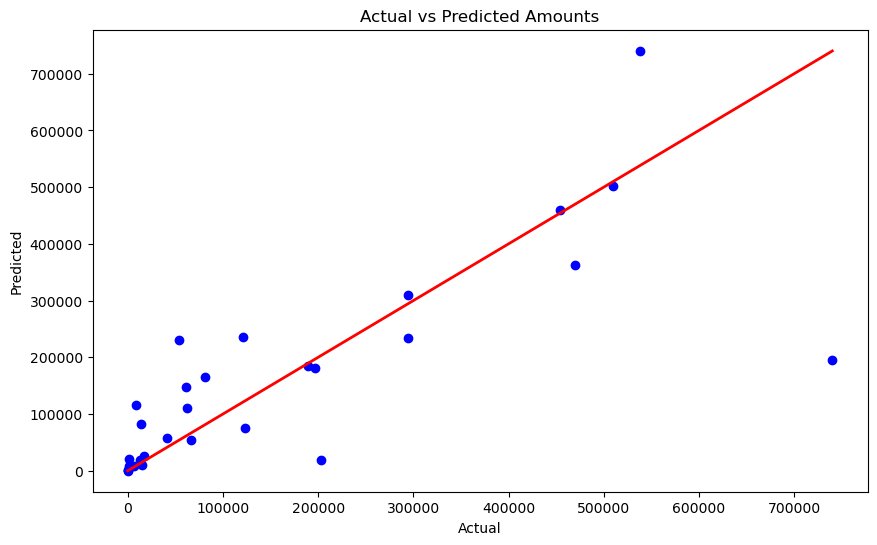

In [37]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### XGBoost

Is a more optimized and efficient implementation of gradient boosting. It is known for its speed and performance and often yields better results in practice. Adjust hyperparameters like n_estimators, learning_rate, max_depth, etc., to fine-tune the model's performance.


In [52]:
# Define the XGBoost model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            xgb.XGBRegressor(
                objective="reg:squarederror",
                random_state=42,
                n_estimators=100,
                max_depth=100,
            ),
        ),
    ]
)

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 12647513753.864971
R^2 Score: 0.6797288880425894
Mean Absolute Error: 75150.56721145548
Root Mean Squared Error: 112461.16553666412


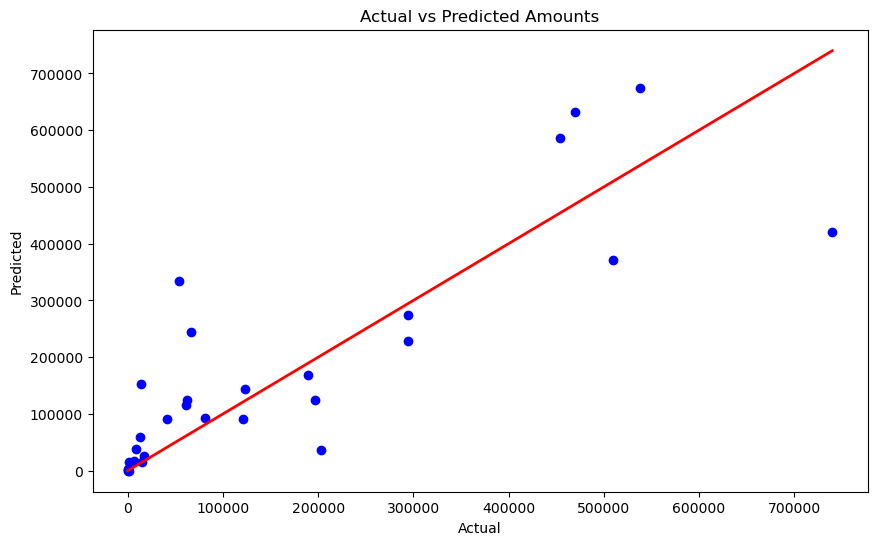

In [55]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### Support Vector Regression (SVR)

Purpose: Uses support vector machines for regression tasks, finding a hyperplane that best fits the data.
Usage: Suitable for small to medium-sized datasets and when the relationship between variables is not strictly linear. Adjust hyperparameters like C, epsilon, and the kernel type to fine-tune the model's performance.


In [42]:
# Define the SVR model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", SVR(kernel="rbf", C=1.0, epsilon=0.1)),
    ]
)

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 45240796882.035706
R^2 Score: -0.1456259787676546
Mean Absolute Error: 141412.27917918385
Root Mean Squared Error: 212698.84081027735


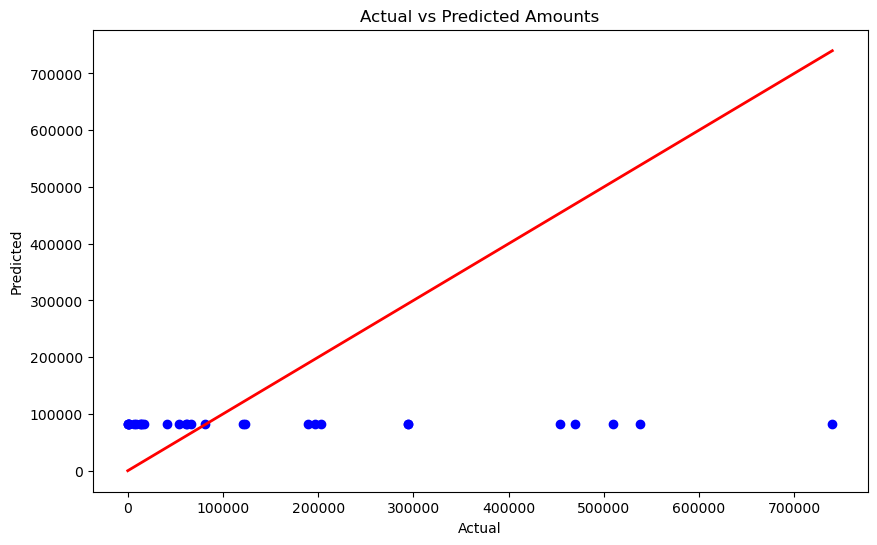

In [45]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()

### K-Nearest Neighbors Regression (KNN)

Purpose: Predicts the target variable by averaging the values of the k-nearest neighbors.
Usage: Suitable for smaller datasets and when the assumption of a linear relationship is not valid. Adjust hyperparameters like n_neighbors to fine-tune the model's performance.


In [29]:
# Define the KNN model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", KNeighborsRegressor(n_neighbors=10)),
    ]
)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 13285864060.712318
R^2 Score: 0.6635640380514298
Mean Absolute Error: 68642.36498275862
Root Mean Squared Error: 115264.32258384343


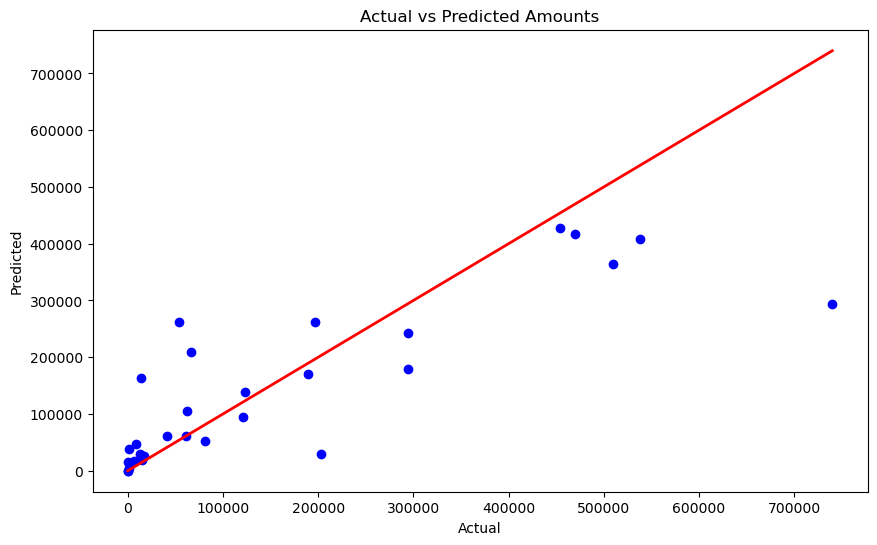

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Amounts")
plt.show()